In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# covid = pd.read_csv("C:/Users/elzbi/OneDrive/Pulpit/jdszr15-materialy-python/Projekt 2/covid_positive")
covid = pd.read_csv("covid_positive")
df = pd.DataFrame(covid)
covid

,COVID_TEST_RESULT,HOSPITALIZED,INTUBED,ADMITTED_TO_ICU,DEAD,AGE,SEX,PREGNANT,SMOKER,PNEUMONIA,COPD,ASTHMA,IMMUNOSUPPRESSED,CARDIOVASCULAR_DISEASE,HYPERTENSION,CHRONIC_KIDNEY_DISEASE,DIABETES,OBESITY,OTHER_DISEASE,MEDICAL_UNIT
0,1,0,NaN,NaN,1,65,female,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
1,1,1,1.0,0.0,1,55,male,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
2,1,0,NaN,NaN,1,68,male,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1
3,1,1,0.0,0.0,0,40,female,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,1,0,NaN,NaN,0,64,female,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113283,1,0,NaN,NaN,0,67,female,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,13
113284,1,1,0.0,0.0,0,77,female,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,13
113285,1,0,NaN,NaN,0,70,male,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,13
113286,1,0,NaN,NaN,0,32,male,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13


C:\Users\elzbi\AppData\Local\Temp\ipykernel_16220\1918390911.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=covid, x="DEAD", y="AGE", palette="Paired", width=0.4)


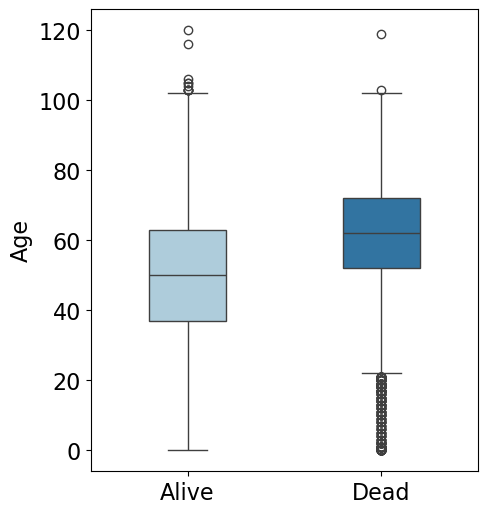

In [10]:
plt.figure(figsize=(5, 6))
sns.boxplot(data=covid, x="DEAD", y="AGE", palette="Paired", width=0.4)
plt.xlabel("")
plt.ylabel("Age")
plt.xticks([0, 1], ['Alive', 'Dead'])
plt.rcParams.update({'font.size': 14, 'font.family': 'sans-serif'})

In [4]:
q1 = covid['AGE'].quantile(0.25)
q3 = covid['AGE'].quantile(0.75)
iqr = q3 - q1
outliers = (covid['AGE'] < (q1 - 1.5 * iqr)) | (covid['AGE'] > (q3 + 1.5 * iqr))
covid_no_outliers = covid[~outliers]
covid_no_outliers

,COVID_TEST_RESULT,HOSPITALIZED,INTUBED,ADMITTED_TO_ICU,DEAD,AGE,SEX,PREGNANT,SMOKER,PNEUMONIA,COPD,ASTHMA,IMMUNOSUPPRESSED,CARDIOVASCULAR_DISEASE,HYPERTENSION,CHRONIC_KIDNEY_DISEASE,DIABETES,OBESITY,OTHER_DISEASE,MEDICAL_UNIT
0,1,0,NaN,NaN,1,65,female,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
1,1,1,1.0,0.0,1,55,male,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
2,1,0,NaN,NaN,1,68,male,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1
3,1,1,0.0,0.0,0,40,female,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,1,0,NaN,NaN,0,64,female,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113283,1,0,NaN,NaN,0,67,female,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,13
113284,1,1,0.0,0.0,0,77,female,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,13
113285,1,0,NaN,NaN,0,70,male,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,13
113286,1,0,NaN,NaN,0,32,male,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13


C:\Users\elzbi\AppData\Local\Temp\ipykernel_16220\1533746409.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=covid_no_outliers, x="DEAD", y="AGE", palette="Paired", width=0.4)


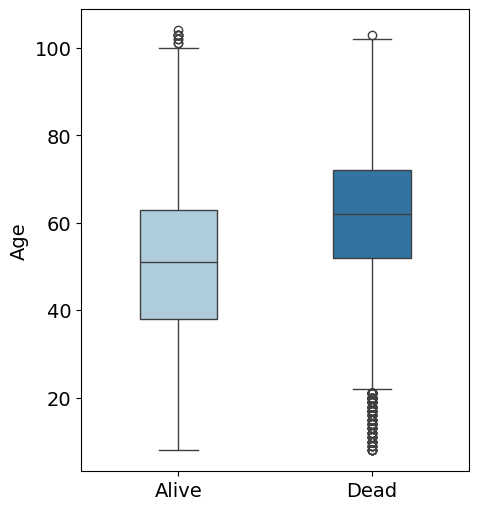

In [11]:
plt.figure(figsize=(5, 6))
sns.boxplot(data=covid_no_outliers, x="DEAD", y="AGE", palette="Paired", width=0.4)
plt.xlabel("")
plt.ylabel("Age")
plt.xticks([0, 1], ['Alive', 'Dead'])
plt.rcParams.update({'font.size': 14, 'font.family': 'sans-serif'})

In [12]:
R, p = stats.pointbiserialr(covid["AGE"], covid["DEAD"])
print(f'The correlation coefficient R is {round(R,2)}.\np-value is {p}.')


The correlation coefficient R is 0.33.
p-value is 0.0.


In [13]:
stats.pointbiserialr(covid_no_outliers["AGE"], covid_no_outliers["DEAD"])
print(f'The correlation coefficient R is {round(R,2)}.\np-value is {p}.')


The correlation coefficient R is 0.33.
p-value is 0.0.


#### **Conclusion:**
Older individuals in the dataset are more likely to die from COVID-19 than younger ones.

However, since the correlation (R = 0.33) is moderate, other factors—such as comorbidities, quality of medical care, or overall health status—also significantly influence mortality.